## Author Name:- Kiran Vijay Patil

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,skew,kurtosis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,confusion_matrix

### Import Dataset

In [2]:
data=pd.read_csv(r"C:\Users\ARJUN SALUNKHE\Documents\Kiran Patil\datasets\student_scores.csv.txt")
print("Data imported Successfully")
data.head(5)

Data imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Preprocessing

### Finding Null values

In [5]:
#Check their is any null value present in our data.
data.isnull().any()

Hours     False
Scores    False
dtype: bool

In [6]:
# Check how many null values present in our data.
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Result:-
* There is no any null values present in our dataset.

### Check Duplicate values in our dataset

In [7]:
data.duplicated().sum()

0

### Result:-
* There is no duplicated values present in our dataset.

## Exploratory Data Analysis (EDA)

### Correlation

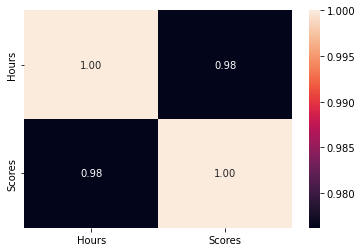

In [8]:
cor=data.corr(method="pearson")
sns.heatmap(cor,annot=True,fmt=".2f")
plt.show()

### Result:-
* There is strong positive correlation between the dependent and independent variable.

## Outlier Detection

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


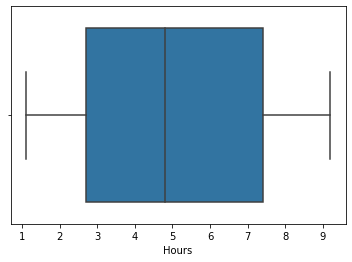

In [9]:
sns.boxplot(data["Hours"])
plt.show()

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


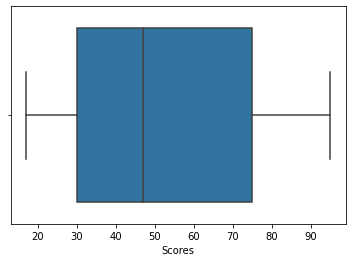

In [10]:
sns.boxplot(data["Scores"])
plt.show()

### Result:-
* There is no any outliers present in our dataset.

## Pair plot

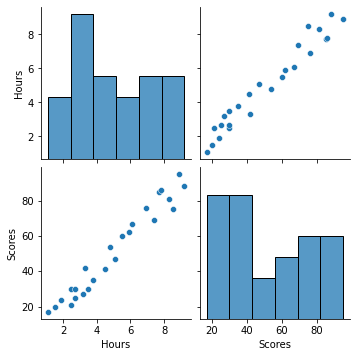

In [11]:
sns.pairplot(data)

* As we can see in above diagram data is linear.

## Check the distribution of Independent & Dependent data.

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


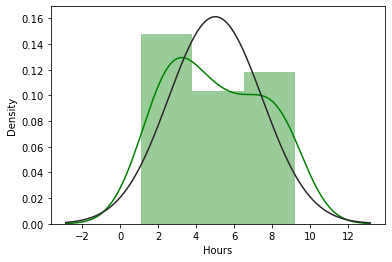

In [12]:
sns.distplot(data["Hours"],fit=norm,color="green")
plt.show()

In [13]:
skew(data["Hours"])

0.1787220638918746

### Result:- 
* Distribution of the Independent data is nearly normal.

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


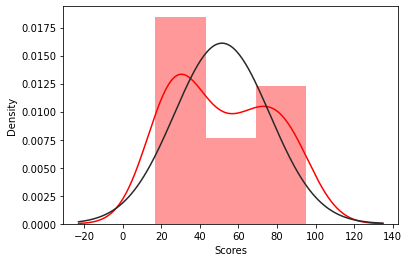

In [14]:
sns.distplot(data["Scores"],fit=norm,color="red")
plt.show()

In [15]:
skew(data["Scores"])

0.21968605283072445

### Result:-
* Distribution of the dependent column is nearly normal.

## Spliting data into independent and dependent (Output) Variable.

* Select the data as an independent and dependent data based on prediction

In [16]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

## Split the data into training and testing data

* Convert 80% data into training data and 20% data as testing data 

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
print("Size of our training data is ",x_train.shape)
print("Size of our testing data is ",x_test.shape)

Size of our training data is  (20, 1)
Size of our testing data is  (5, 1)


## Check Assumptions of Linear Regression model

### for this continuous value prediction we use Simple_Linear_Regression. Because we have only one independent and only one dependent variable.

* Now lets check the assumptions of linear Regression:- 
    
* 1) Data should be linear.
* 2) No or less Multicollinearity.
* 3) Error should be normally distributed with mean 0 and variance 1.
* 4) Homoscedasticity
* 5) No Autocorrelation.

### Assumption 1:- Data should be linear.

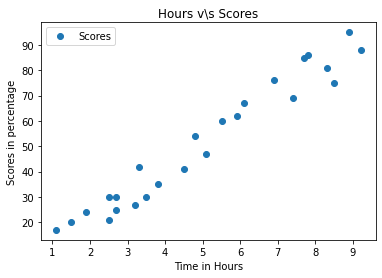

In [19]:
data.plot(x="Hours",y="Scores",style="o")
plt.title("Hours v\s Scores")
plt.xlabel("Time in Hours")
plt.ylabel("Scores in percentage")
plt.show()

### Result:-
* Above scatter plot shows us there is an linearity present in hours and scores of the students.

### Assumption 2:- No or less multicollinearity.

* Range of Multicollinearity.


* if   vif   >  5   ==>      Multicollinearity.

* if   1 <   vif   <   5   ==> Less collinearity

* if   vif   = 1   ==>        No collinearity

### Result:- 
* In our data we have only one independent column so we does not need to find out the variance_inflation_factor or multicollinearity.

## Training & Fitting of model

In [20]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)

In [21]:
y_pred=lr.predict(x_test)

In [22]:
err=y_test-y_pred

### Model Evaluating

In [23]:
mse=mean_squared_error(y_test,y_pred)
mse

21.5987693072174

In [24]:
error=np.sqrt(mse)
print("error of the model is ",error)

error of the model is  4.6474476121003665


## Check assumptions of Errors.

### Assumption 3:- Error should be normally distributed with mean 0 and variance 1.

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

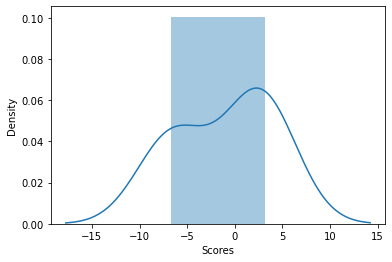

In [25]:
sns.distplot(err)

### Result:- 
* Errors are normally distributed.

### Assumption 4:- Homoscedasticity

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Scores'>

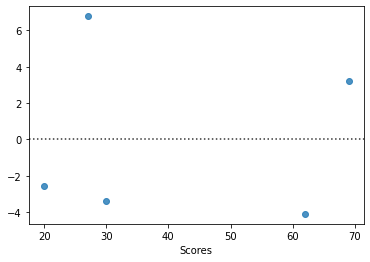

In [26]:
sns.residplot(y_test,y_pred)

### Result:-
* errors in the data is homoscedastic.

### Assumption 5:- No Autocorrelation

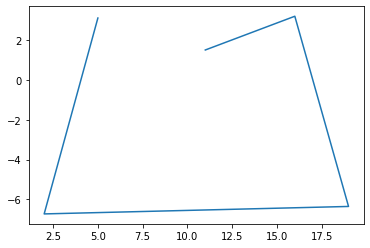

In [27]:
plt.plot(err)

### Result:- 
* Above graph shows there is no any Autocorrelation between error.

## Comparison of Actual data & Predictive data

In [28]:
df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


## Visualize best fitted line

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

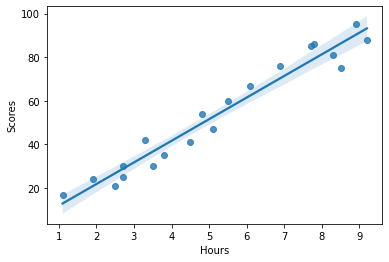

In [29]:
sns.regplot(x_train,y_train)

In [30]:
model.coef_

array([9.91065648])

In [31]:
model.intercept_

2.018160041434683

### Predict the marks based on 9.25 hrs/day

In [32]:
hr=9.25
pred=lr.predict([[hr]])
print("If student study for ",hr,"hours get the marks are",pred)

If student study for  9.25 hours get the marks are [93.69173249]


C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
print("R2 score of the model is",r2_score(y_test,y_pred)*100)

R2 score of the model is 94.54906892105356
